In [2]:
!ls ../airflow/plugins/utils/

db.py  __pycache__  tinkoff.py


In [3]:
import sys
sys.path.insert(0, '../airflow/plugins/utils/')

In [4]:
import pandas as pd
import numpy as np
import db
import matplotlib.pyplot as plt

In [5]:
def _get_db_url(connector: str) -> str:
    return 'user=trader password=income host=localhost port=5432 dbname=stocks'

In [6]:
db._get_db_url = _get_db_url

In [7]:
data = db.get_data_from_table('adsdf', 'aapl')

In [8]:
data.head()

,time,open,high,low,close,volume
0,2020-02-18 07:00:00,80.51,80.76,77.60,79.75,38141376
1,2020-02-19 07:00:00,80.01,81.14,79.67,80.91,28958280
2,2020-02-20 07:00:00,81.21,81.25,79.50,80.08,25971548
3,2020-02-21 07:00:00,79.51,80.10,77.63,78.26,41238888
4,2020-02-24 07:00:00,76.75,77.27,72.31,74.55,74369592


In [9]:
SMA_SHORT = 50
SMA_LONG = 200

In [10]:
data['sma_short'] = data['close'].rolling(SMA_SHORT).mean()
data['sma_long'] = data['close'].rolling(SMA_LONG).mean()

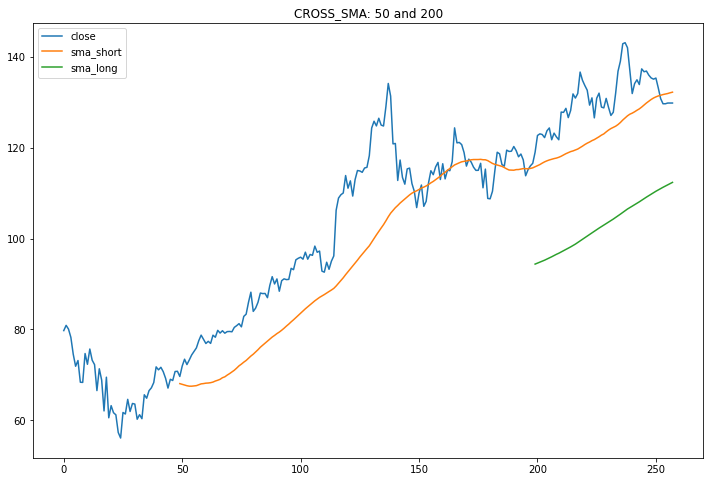

In [11]:
data[['close', 'sma_short', 'sma_long']] \
    .plot(figsize=(12, 8), title=f'CROSS_SMA: {SMA_SHORT} and {SMA_LONG}');

In [12]:
data['position'] = np.where(data['sma_short'] > data['sma_long'], 1, -1)

[2021-02-20 22:01:09,731] {utils.py:141} INFO - NumExpr defaulting to 4 threads.


In [13]:
data['position'].value_counts()

-1    199
 1     59
Name: position, dtype: int64

In [14]:
data.tail(10)

,time,open,high,low,close,volume,sma_short,sma_long,position
248,2021-02-10 07:00:00,136.51,137.34,134.41,135.39,15590571,130.6534,109.79590,1
249,2021-02-11 07:00:00,135.39,136.36,133.79,135.13,13551807,130.9750,110.12330,1
250,2021-02-12 07:00:00,134.80,135.50,133.71,135.37,14199593,131.2280,110.44050,1
251,2021-02-16 07:00:00,136.71,136.72,132.82,133.19,18658772,131.4302,110.73920,1
252,2021-02-17 07:00:00,133.66,133.66,129.50,130.84,21042119,131.5882,111.03205,1
253,2021-02-18 07:00:00,130.80,131.38,127.43,129.71,20428185,131.7374,111.31415,1
254,2021-02-18 07:00:00,130.80,131.38,127.43,129.71,20428185,131.8566,111.59075,1
255,2021-02-19 07:00:00,129.95,130.78,128.50,129.87,21624018,131.9664,111.86430,1
256,2021-02-19 07:00:00,129.95,130.78,128.50,129.87,21624018,132.1282,112.13395,1
257,2021-02-19 07:00:00,129.95,130.78,128.50,129.87,21624018,132.2608,112.39565,1
